# Exploratory Spectral Analysis of EFRI

In [13]:
cd ../../

/Users/adam2392/Documents/motor-decoding


In [59]:
from mne.time_frequency import tfr_multitaper, AverageTFR
from mne_bids import read_raw_bids, BIDSPath

import matplotlib.pyplot as plt
import mne
import numpy as np
import pandas as pd
import seaborn as sns
from mtsmorf.move_exp.functions.move_experiment_functions import get_event_data
from mne.time_frequency import tfr_morlet, tfr_multitaper


In [19]:
root = '/Users/adam2392/Dropbox/efri/'
subject = 'efri07'
session = 'efri'
task = 'move'
acquisition = 'seeg'
run = '01'
datatype = 'ieeg'
extension = '.vhdr'

bids_path = BIDSPath(subject=subject, session=session,
                    task=task, acquisition=acquisition,
                    run=run, datatype=datatype, 
                    suffix='ieeg', extension=extension,
                    root=root) 

In [20]:
raw = read_raw_bids(bids_path)

Extracting parameters from /Users/adam2392/Dropbox/efri/sub-efri07/ses-efri/ieeg/sub-efri07_ses-efri_task-move_acq-seeg_run-01_ieeg.vhdr...
Setting channel info structure...
Reading events from /Users/adam2392/Dropbox/efri/sub-efri07/ses-efri/ieeg/sub-efri07_ses-efri_task-move_acq-seeg_run-01_events.tsv.
Reading channel info from /Users/adam2392/Dropbox/efri/sub-efri07/ses-efri/ieeg/sub-efri07_ses-efri_task-move_acq-seeg_run-01_channels.tsv.


<ipython-input-20-7298192decbd>:1: RuntimeWarning: Did not find any electrodes.tsv associated with sub-efri07_ses-efri_task-move_acq-seeg_run-01.

The search_str was "/Users/adam2392/Dropbox/efri/sub-efri07/**/sub-efri07_ses-efri*electrodes.tsv"
  raw = read_raw_bids(bids_path)
<ipython-input-20-7298192decbd>:1: RuntimeWarning: Did not find any coordsystem.json associated with sub-efri07_ses-efri_task-move_acq-seeg_run-01.

The search_str was "/Users/adam2392/Dropbox/efri/sub-efri07/**/sub-efri07_ses-efri*coordsystem.json"
  raw = read_raw_bids(bids_path)


In [21]:
raw.drop_channels(raw.info['bads'])
raw.pick_types(seeg=True)

<RawBrainVision | sub-efri07_ses-efri_task-move_acq-seeg_run-01_ieeg.eeg, 130 x 2614000 (1307.0 s), ~132 kB, data not loaded>

In [37]:
# Read data
epochs, labels = get_event_data(bids_path, tmin=-1.5, tmax=1.25)


Extracting parameters from /Users/adam2392/Dropbox/efri/sub-efri07/ses-efri/ieeg/sub-efri07_ses-efri_task-move_acq-seeg_run-01_ieeg.vhdr...
Setting channel info structure...
Reading events from /Users/adam2392/Dropbox/efri/sub-efri07/ses-efri/ieeg/sub-efri07_ses-efri_task-move_acq-seeg_run-01_events.tsv.
Reading channel info from /Users/adam2392/Dropbox/efri/sub-efri07/ses-efri/ieeg/sub-efri07_ses-efri_task-move_acq-seeg_run-01_channels.tsv.
Reading 0 ... 2613999  =      0.000 ...  1306.999 secs...


/Users/adam2392/Documents/motor-decoding/mtsmorf/io/read.py:262: RuntimeWarning: Did not find any electrodes.tsv associated with sub-efri07_ses-efri_task-move_acq-seeg_run-01.

The search_str was "/Users/adam2392/Dropbox/efri/sub-efri07/**/sub-efri07_ses-efri*electrodes.tsv"
  raw = read_raw_bids(bids_path)
/Users/adam2392/Documents/motor-decoding/mtsmorf/io/read.py:262: RuntimeWarning: Did not find any coordsystem.json associated with sub-efri07_ses-efri_task-move_acq-seeg_run-01.

The search_str was "/Users/adam2392/Dropbox/efri/sub-efri07/**/sub-efri07_ses-efri*coordsystem.json"
  raw = read_raw_bids(bids_path)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 13201 samples (6.601 sec)

Used Annotations descriptions: ['At Center', 'False Start', 'Go Cue', 'Held Target', 'Hit Target', 'Left Target', 'Reserved (End Trial)', 'Reserved (Start Trial)', 'Reward', 'Show Center', 'Speed Fail', 'Speed Feedback', 'Speed Instruction']
Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Loading data for 96 events and 5501 original time points ...
0 bad epochs dropped
Setting up band-pass filter from 1 - 1e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-dom

/Users/adam2392/Documents/motor-decoding/mtsmorf/move_exp/functions/move_experiment_functions.py:16: RuntimeWarning: filter_length (6601) is longer than the signal (5501), distortion is likely. Reduce filter length or filter a longer signal.
  new_epochs = epochs.filter(l_freq=1, h_freq=fs / 2 - 1)


Dropped 20 epochs: 3, 4, 9, 12, 13, 33, 38, 40, 41, 48, 51, 53, 68, 76, 81, 82, 86, 87, 90, 95


In [74]:
print(epochs._units)

AttributeError: 'Epochs' object has no attribute '_units'

In [62]:
print(epochs.info)

<Info | 9 non-empty values
 bads: []
 ch_names: G8, G7, G3, G2, G1, V8, V7, V6, V4, V3, V2, V1, D9, D8, D3, D2, ...
 chs: 75 SEEG
 custom_ref_applied: False
 highpass: 1.0 Hz
 line_freq: 60.0
 lowpass: 250.0 Hz
 meas_date: 2000-01-01 00:00:00 UTC
 nchan: 75
 projs: []
 sfreq: 500.0 Hz
 subject_info: 4 items (dict)
>


In [48]:
print(epochs.ch_names)

['G8', 'G7', 'G3', 'G2', 'G1', 'V8', 'V7', 'V6', 'V4', 'V3', 'V2', 'V1', 'D9', 'D8', 'D3', 'D2', 'D1', 'U8', 'U7', 'U6', 'U5', 'U4', 'U3', 'U2', 'U1', 'C8', 'C7', 'C6', 'C5', 'C1', 'F9', 'F8', 'F7', 'F6', 'F2', 'F1', 'B10', 'B9', 'B8', 'B7', 'B3', 'B2', 'B1', 'E6', 'E5', 'E4', 'E3', 'E2', 'E1', 'I4', 'I3', 'I2', 'I1', 'P8', 'P7', 'P6', 'P5', 'P3', 'P1', 'W9', 'W8', 'W7', 'W6', 'W5', 'W1', 'X9', 'X8', 'X1', 'O8', 'O7', 'O6', 'O5', 'O4', 'O2', 'O1']


In [49]:
# Set frequency variables
picks = ['B7', 'B8', 'B9', 'G8']
nfreqs = 50
lfreq, hfreq = (1, 200)

In [95]:
def plot_spectrogram(power, freqs, n_cycles, picks, func='average', db=False):
    if not isinstance(power, AverageTFR):
        if func == 'average':
            avgpower = power.average()
            avgpower_data = avgpower.data
        elif func == 'median':
            avgpower_data = np.median(power.data / 1e6, axis=0) 
    else:
        avgpower_data = power.data
    
    ch_names = power.ch_names
#     avgpower_data = avgpower.data / 1e6
    times = power.times
    time_lock = np.where(times == 0)[0][0]
    xticks = [0, time_lock, len(times)-1]
    xticklabels = [f"{label:.1f}" for label in times[xticks]]
    yticks = np.arange(0, nfreqs, 2)
    yticklabels = [f"{freq:.1f}" for freq in freqs[yticks]]
    
    fig, axs = plt.subplots(ncols=len(picks), dpi=100, figsize=(20, 6))
    axs = axs.flatten()
    for i, pick in enumerate(picks):
        ax = axs[i]
        ind = ch_names.index(pick)
        
        data = avgpower_data[ind]
        if db:
            data = np.log10(data)
            
        sns.heatmap(
            data,
#             vmin=0,
#             vmax=np.max(dB_data),
#             center=0.0,
            cmap='viridis',
            cbar_kws={'label': 'dB'},
            ax=ax
        )
        ax.invert_yaxis()
        ax.axvline(x=time_lock, ls='--')
        ax.set(
            xlabel="Time(s)", 
            ylabel="Frequency (Hz)", 
            title=pick, 
            xticks=xticks,
            yticks=yticks,
        )
        ax.set_xticklabels(xticklabels, rotation=0),
        ax.set_yticklabels(yticklabels, rotation=0)
    fig.tight_layout()


In [52]:
# Morlet
freqs = np.logspace(*np.log10([lfreq, hfreq]), num=nfreqs)
n_cycles = freqs / 3.0
power = tfr_morlet(
    epochs, freqs=freqs, n_cycles=n_cycles, average=False, 
    return_itc=False, decim=1, n_jobs=-1
)
# power.crop(tmin=-0.5, tmax=1.0)

print(power)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done  64 tasks      | elapsed:   15.2s
[Parallel(n_jobs=8)]: Done  75 out of  75 | elapsed:   17.3s finished


Not setting metadata
<EpochsTFR | time : [-1.500000, 1.248000], freq : [1.000000, 200.000000], epochs : 76, channels : 75, ~2.92 GB>


In [53]:
orig_power = power.copy()

In [92]:
power.apply_baseline((-1.5, -1), mode='zlogratio')

Applying baseline correction (mode: zlogratio)


<EpochsTFR | time : [-1.500000, 1.248000], freq : [1.000000, 200.000000], epochs : 76, channels : 75, ~2.92 GB>

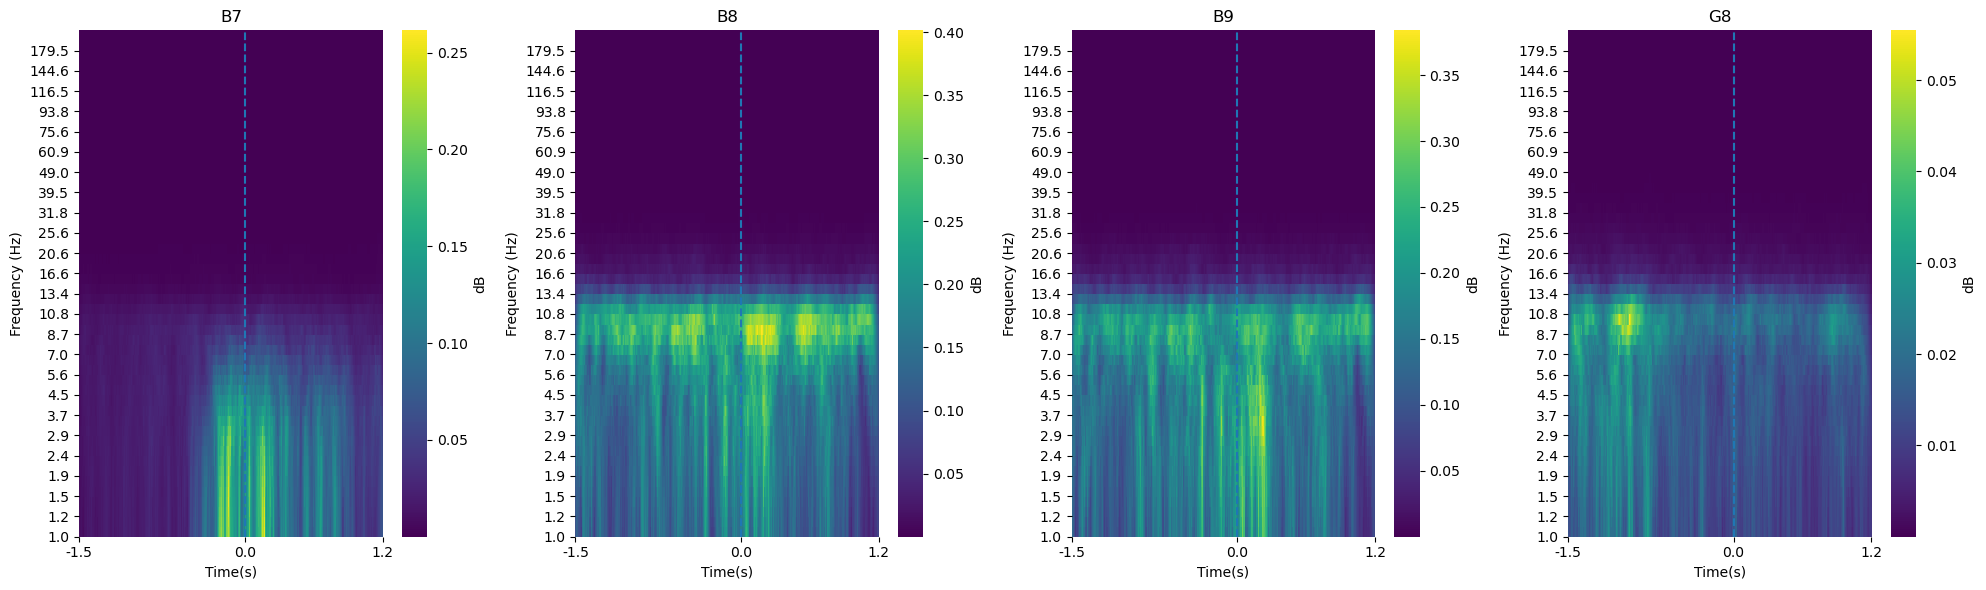

In [91]:
plot_spectrogram(power, freqs, n_cycles, picks);

In [56]:
n_cycles = freqs / 2.
time_bandwidth = 2.0  # Least possible frequency-smoothing (1 taper)
power = tfr_multitaper(epochs, freqs=freqs, n_cycles=n_cycles,
                       n_jobs=-1, average=False,
                       time_bandwidth=time_bandwidth, return_itc=False)

In [85]:
power = orig_power.copy()

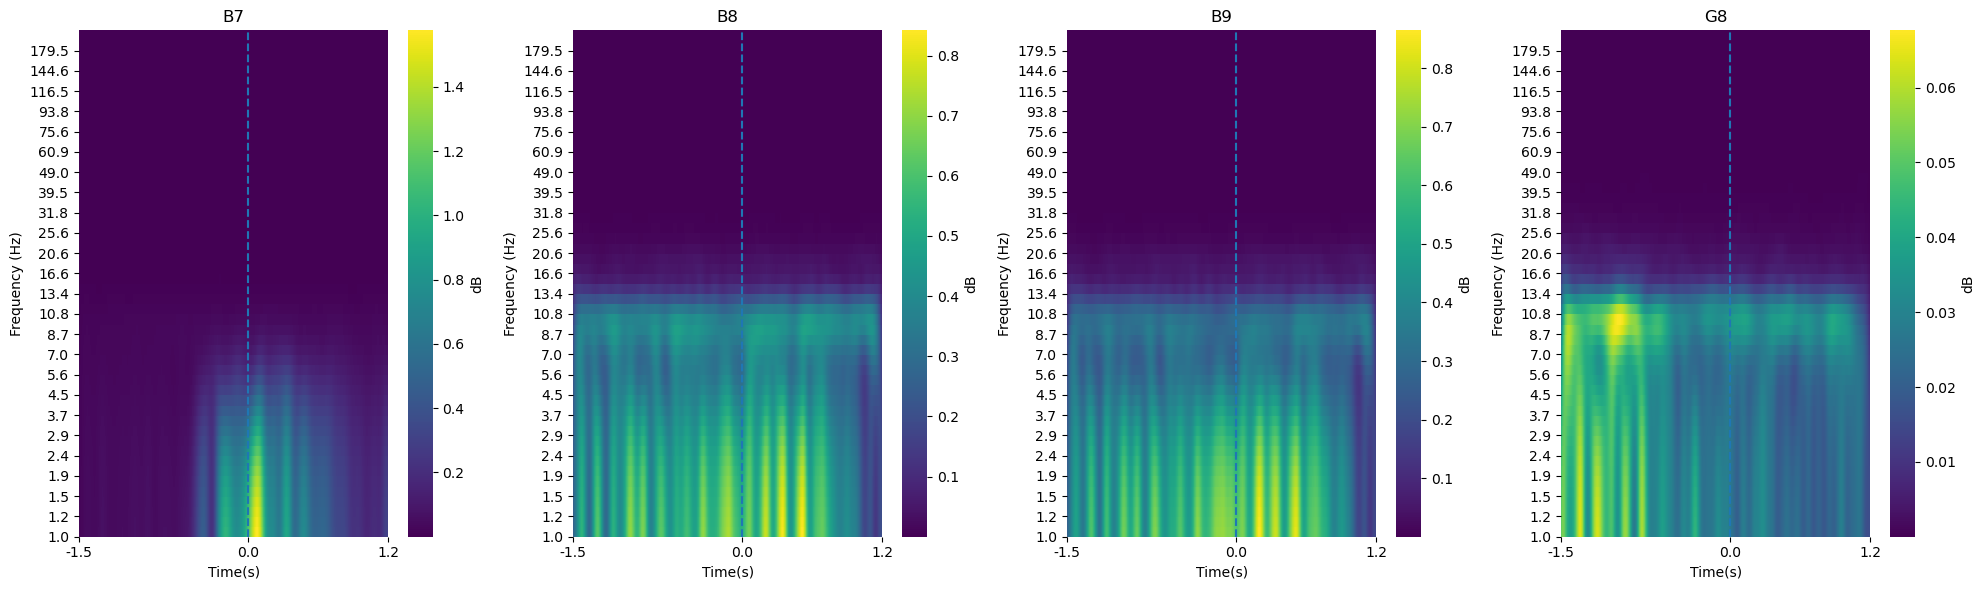

In [87]:
plot_spectrogram(power, freqs, n_cycles, picks, db=False);

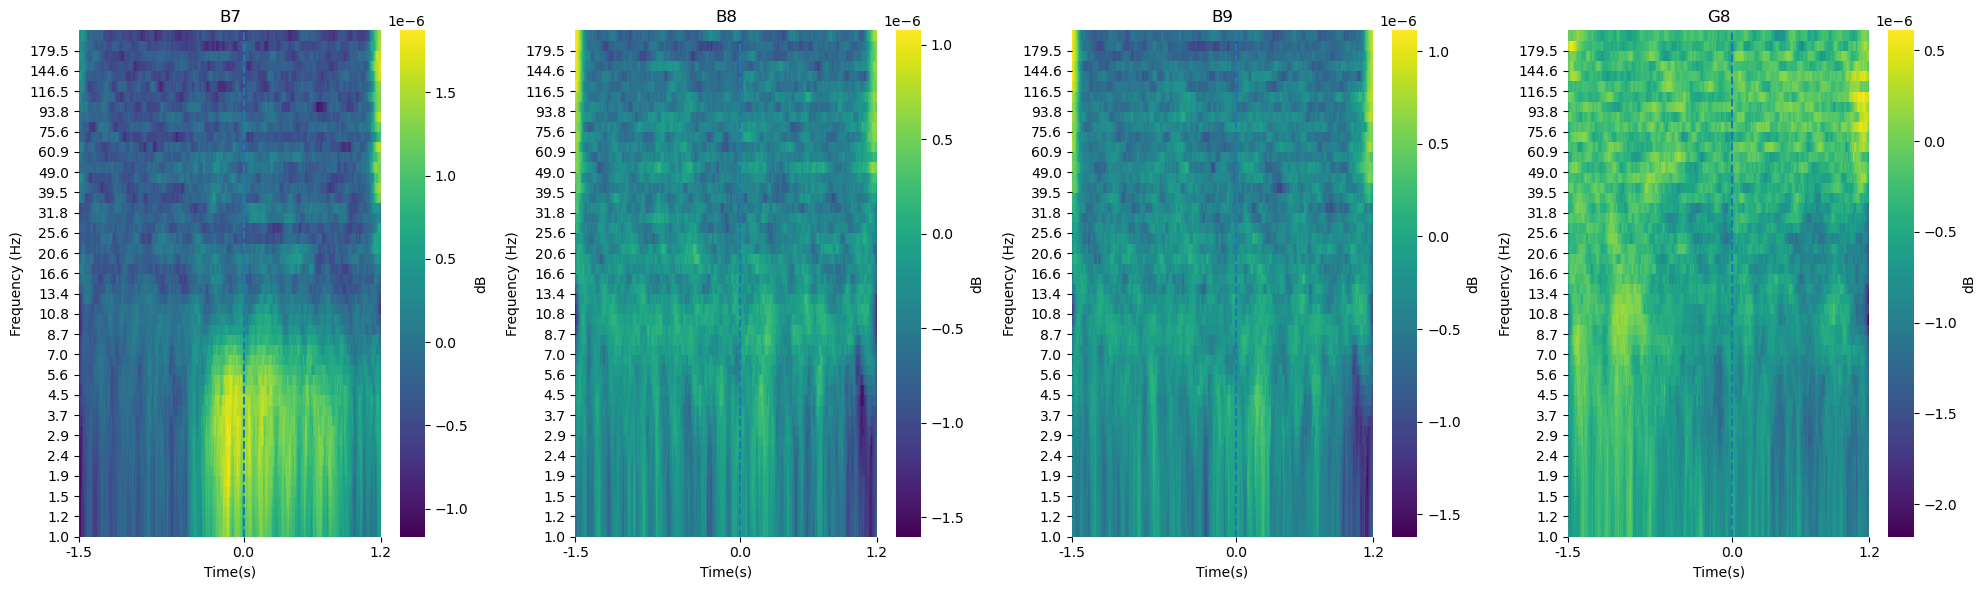

In [96]:
plot_spectrogram(power, freqs, n_cycles, picks, func='median');

In [ ]:

# Multitaper
freqs = np.logspace(*np.log10([lfreq, hfreq]), num=nfreqs)
n_cycles = freqs / 3.0
power = tfr_multitaper(
    epochs, freqs=freqs, n_cycles=n_cycles, average=False, return_itc=False, decim=3, n_jobs=-1
)
power.crop(tmin=-0.5, tmax=1.0)
print(power)

In [ ]:
plot_spectrogram(power, freqs, n_cycles, picks)